In [2]:
import pandas as pd
df= pd.read_csv("Fake_Real_Data.csv")

In [3]:
df

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real
...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake
9896,Trump consults Republican senators on Fed chie...,Real
9897,Trump lawyers say judge lacks jurisdiction for...,Real
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake


In [4]:
# Check  the distribution of labels 
df['label'].value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

#### From the above, we can see that almost the labels(classes) occured equal number of times and balanced. There is no problem of class imbalance and hence no need to apply any balancing techniques like undersampling, oversampling etc.

In [7]:
# Add the new column which gives a unique number to each  of these labels 

df['label_num'] = df['label'].map({'Fake':0, 'Real':1})

# Check the results with top 5 rows
df.head(5)

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


# Modelling without Pre-processing text data


In [10]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too

from sklearn.model_selection import train_test_split


X_train ,  X_test , y_train, y_test = train_test_split(
    df.Text,
    df.label_num,
    test_size=0.2,
    random_state=2022,
    stratify=df.label_num
)

In [11]:
#print the shapes of X_train and X_test

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (7920,)
Shape of X_test:  (1980,)


### Attempt 1 :

### using sklearn pipeline module create a classification pipeline to classify the Data.

Note:

using CountVectorizer with unigram, bigram, and trigrams.
use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.
print the classification report.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# Create a pipeline object 

clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range=(1,3))),
    ('KNN',(KNeighborsClassifier(n_neighbors=10, metric='euclidean')))
])


clf.fit(X_train, y_train)




In [16]:

y_pred = clf.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.49      0.65      1000
           1       0.65      0.98      0.78       980

    accuracy                           0.73      1980
   macro avg       0.81      0.74      0.72      1980
weighted avg       0.81      0.73      0.72      1980



In [18]:
# Attempt 2 :

# using the sklearn pipeline module create a classification pipeline to classify the Data.
# Note:

# using CountVectorizer with unigram, bigram, and trigrams.
# use KNN as the classifier with n_neighbors of 10 and metric as 'cosine' distance.
# print the classification report.

In [25]:
# Create pipeline

clf = Pipeline([
    ('vectorizer_bigrams', CountVectorizer(ngram_range=(1,2))),
    # ('vectorizer_trigrams', CountVectorizer(ngram_range=(1,3))),
    ('KNN', (KNeighborsClassifier(n_neighbors=10, metric='cosine')))
])



In [26]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer_bigrams', CountVectorizer(ngram_range=(1, 2))),
                ('KNN', KNeighborsClassifier(metric='cosine', n_neighbors=10))])

In [27]:
#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

In [28]:

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83      1000
           1       0.77      1.00      0.87       980

    accuracy                           0.85      1980
   macro avg       0.88      0.85      0.85      1980
weighted avg       0.88      0.85      0.85      1980



In [33]:
from  sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    # ('vectorizer_n_grams', CountVectorizer(ngram_range = (1, 2))), 
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (3, 3))),                       #using the ngram_range parameter 
    #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))
])

In [34]:
#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



Text(95.72222222222221, 0.5, 'Truth')

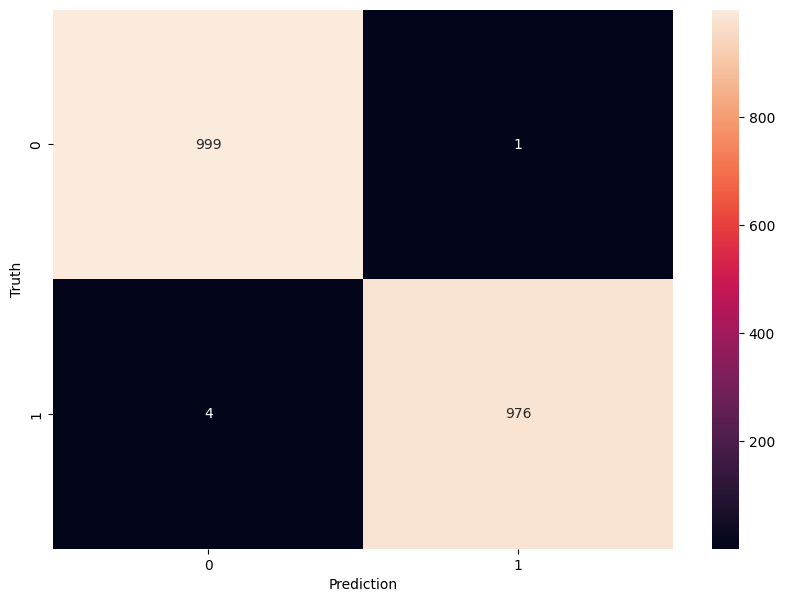

In [35]:
#finally print the confusion matrix for the best model

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')